<a href="https://colab.research.google.com/github/caxaxa/Chacha_PhD_Projects/blob/master/Incentive_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def get_IC_star(R_star,P_star):
    n = 1000
    x = np.arange(0.0000001, 1,1/n )
    N = 0.5


    alphas = np.zeros(n)
    for i in range(0,n,1):
      beta = i/n 
      α = 0
      while get_y_receiver(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a),c)>0:
        α += 1/n
        if α>1.01:
          break
      alphas[i] = α -1/n


    #Ploting Indiference curves


    R = []
    for i in x:
        R.append( (((R_star*f)/(gamma**2))+a)/(i*(a+f))) #

    R = np.asarray(R)  


    # P = []

    # for i in x:
    #   P.append( ((((P_star*(f))/gamma)+(a))/(a+f)) +i*0 ) #

    # P = np.asarray(P) 
    P =  ((((P_star*(f))/gamma)+(a))/(a+f))

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphas, linewidth=2)#
    ax.plot(x,R,'-.',linewidth=.5 )
    ax.axvline(P, color= 'green', linewidth = .8)
    # ax.plot(P, x ,linewidth=.5 )

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.1, 0.9, '$𝛼$')
    #fig.text(0.65, 0.08, '$𝛽~(P*) $')
    #fig.text(0.02, 0.485, '$𝛼~(R*)$')

    
    lim = int(P*n) 

    ax.fill_between(x[0:lim + 1], alphas[0:lim + 1], facecolor='salmon', alpha=0.1)
    ax.fill_between(x, alphas , R ,facecolor='white', alpha=1,label='_nolegend_')
    ax.fill_between(x, alphas, R, facecolor='yellow', alpha=0.1)
    ax.fill_between(P, x, facecolor='yellow', alpha=0.1)
    ax.fill_between(x[lim + 1 : n], R[lim + 1 : n], facecolor='green', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('IC Payer','Self-Reporting Bonus','Plea Agreement', 'Corruption Zone','Plea Bragaining','Self-Reporting'), loc='upper right')
    plt.savefig('./fig2.pdf')
    plt.show()

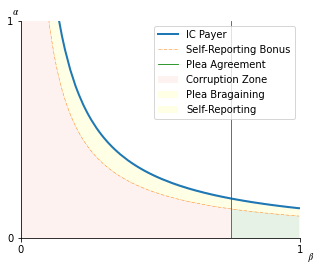

In [151]:
get_IC_star(-.5,.5)

In [112]:
((((0.5*(f))/gamma)+(a))/(a+f))

0.7530864197530864

In [101]:
def get_ICs(alphas):
    n = 1000
    x = np.arange(0, 1,1/n )

    #Ploting Indiference curves

    fig, ax = plt.subplots(figsize = (5,4))

    ax.plot(x, alphas, linewidth=2)

    fig.add_subplot(ax)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    fig.text(0.92, 0.05, '$𝛽$')
    fig.text(0.11, 0.9, '$𝛼$')

    ax.fill_between(x, alphas, facecolor='salmon', alpha=0.1)

    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid(False)
    plt.xticks(np.arange(0,1.1,1))
    plt.yticks(np.arange(0,1.1,1))
    #plt.title('Indiference curves')
    plt.legend(('Incentive Constraint','Corruption Zone' ),loc='best', shadow=False)
    #plt.grid(True)
    # fig.text(0.18, 0.2, 'Corruption')
    # fig.text(0.5, 0.4, 'No Corruption')
    plt.savefig('./fig1.pdf')
    plt.show()

In [6]:
def get_b_star(gamma,alpha,beta,c,a):
  return (((gamma**2)*((1-alpha*beta)*a-alpha*beta*f)) + ((gamma**2*alpha*beta*f + c)/((gamma**2)*(1-alpha*beta))))/2

def get_y_payer(gamma,alpha,beta,f,b):
  return -b +(gamma**2)*((1-alpha*beta)*a - alpha*beta*f)

def get_y_receiver(gamma,alpha,beta,f,b,c):
  return -c +(gamma**2)*((1-alpha*beta)*b - alpha*beta*f)



In [7]:
a = 4
f = 5
c = 1
alpha = 0
beta = 0
gamma = .9



In [8]:
#Fixed point solution
# Numerical Solution
def alpha_solver(n):
  alphas = np.zeros(n)
  for i in range(0,n,1):
    beta = i/n 
    α = 0
    while get_y_receiver(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a),c)>0:
      α += 1/n
      if α>1.01:
        break
    alphas[i] = α -1/n
  return alphas

alphas = alpha_solver(1000)

In [9]:
#CHeck if the result is the same for the receiver
# #Fixed point solution
# # Numerical Solution
# alphas = np.zeros(100)
# for i in range(0,100,1):
#   beta = i/100 
#   α = 0
#   while get_y_payer(gamma,α,beta,f,get_b_star(gamma,α,beta,c,a))>0:
#     α += .01
#     if α>1.02:
#       break
#   alphas[i] = α -0.01
  

# alphas

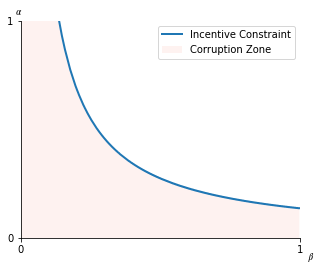

In [10]:
get_ICs(alphas)

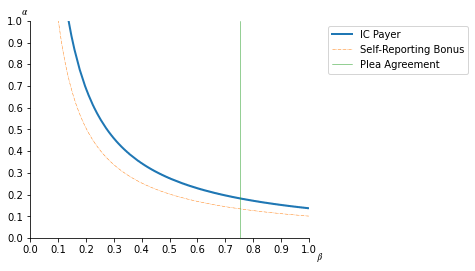

In [19]:
get_IC_star(-.5,.5)